<a href="https://colab.research.google.com/github/usshaa/BK_BIRLA_DL/blob/main/02_DL/04_Classify_whether_a_tumor_is_malignant_or_benign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **ANN for Binary Classification**

### 🎯 Objective: Classify whether a tumor is malignant or benign

We’ll use the **Breast Cancer Wisconsin dataset** from `sklearn.datasets`.


#### 1. 📦 Import Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

#### 2. 📊 Load & Prepare Dataset

In [ ]:
# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target  # 0 = malignant, 1 = benign

In [ ]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Normalize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### 3. 🏗️ Build ANN Model for Binary Classification

In [ ]:
model = Sequential([
    Dense(16, input_dim=X_train.shape[1], activation='relu'),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')  # Output for binary classification
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 4. ⚙️ Compile the Model

In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

### 5. 🚀 Train the Model

In [ ]:
history = model.fit(X_train, y_train,
                    epochs=100,
                    batch_size=10,
                    validation_split=0.1,
                    verbose=0)

### 6. 📈 Plot Training History

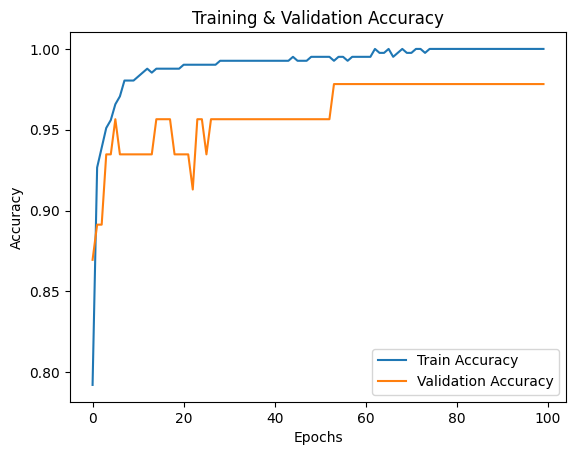

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training & Validation Accuracy')
plt.show()

### 7. ✅ Evaluate the Model

In [ ]:
# Predict
y_pred = (model.predict(X_test) > 0.5).astype("int32")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


In [ ]:
# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[42  1]
 [ 3 68]]

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95        43
           1       0.99      0.96      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



| **Concept**             | **Implementation**                                |
| ----------------------- | ------------------------------------------------- |
| **Binary Output Layer** | `Dense(1, activation='sigmoid')`                  |
| **Loss Function**       | `'binary_crossentropy'`                           |
| **Evaluation Metrics**  | Accuracy, Confusion Matrix, Classification Report |
| **Optimizer**           | `'adam'`                                          |
| **Normalization**       | StandardScaler for better convergence             |